# Let's analyze Amazon Data quickly.....

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Firstly,We are going to learn how to translate datasets from a different Language,and NB:we add ,(encoding='iso-8859-1') to the back of our read parameters to read different formats

In [2]:
df=pd.read_csv('amazon.csv',encoding='iso-8859-1')
df.head(10)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [3]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [4]:
df.shape

(6454, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


1.Check For Duplicate Values

In [6]:
dup_df=df.duplicated().any()
dup_df

True

In [7]:
df=df.drop_duplicates()
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [8]:
df.shape

(6422, 5)

In [9]:
6454-6422

32

2. Check Null Values In The Dataset

In [10]:
df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [11]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


3 Rename Month Names From Portuguese To English

In [12]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [13]:
df['new_month']=df['month'].map({'Janeiro':'Jan',
                                'Fevereiro':'Feb',
                                'Marco':'March',
                               'Abril':'April',
                               'Maio':'May',
                               'Junho':'June',
                               'Julho':'July',
                               'Agosto':'August',
                               'Setembro':'Sept',
                               'Outubro':'Oct',
                               'Novembro':'Nov',
                               'Dezembro':'Dec'
                                })

In [14]:
df.head()

,year,state,month,number,date,new_month
0,1998,Acre,Janeiro,0.0,1998-01-01,Jan
1,1999,Acre,Janeiro,0.0,1999-01-01,Jan
2,2000,Acre,Janeiro,0.0,2000-01-01,Jan
3,2001,Acre,Janeiro,0.0,2001-01-01,Jan
4,2002,Acre,Janeiro,0.0,2002-01-01,Jan


In [15]:
df1=df.drop('month',axis=1)
df1.head()

,year,state,number,date,new_month
0,1998,Acre,0.0,1998-01-01,Jan
1,1999,Acre,0.0,1999-01-01,Jan
2,2000,Acre,0.0,2000-01-01,Jan
3,2001,Acre,0.0,2001-01-01,Jan
4,2002,Acre,0.0,2002-01-01,Jan


In [16]:
df1.shape

(6422, 5)

4.Which Month Maximum Number Of Forest Fires were Reported

In [17]:
df1.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [18]:
df1a=df1.groupby('new_month')['number'].sum().reset_index()
df1a

,new_month,number
0,April,28184.770
1,August,88050.435
2,Dec,57535.480
3,Feb,30839.050
4,Jan,47681.844
5,July,92319.113
6,June,55997.675
7,May,34725.363
8,Nov,85508.054
9,Oct,88681.579


To Visualize,

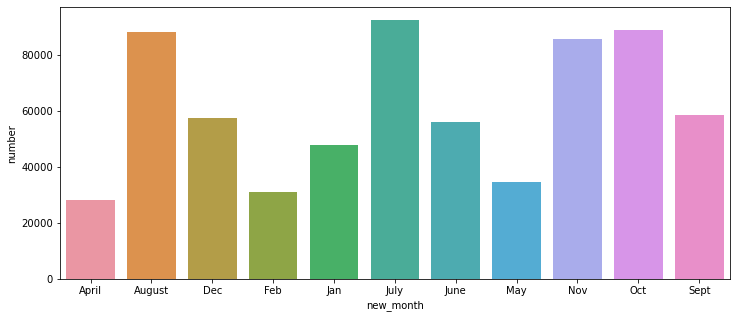

In [19]:
plt.figure(figsize=(12,5))
sns.barplot(x='new_month',y='number',data=df1a)
plt.show()

5.Which Year Maximum Number Of Forest Fires were Reported

In [20]:
df1.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [21]:
df1b=df1.groupby('year')['number'].sum().reset_index()
df1b

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


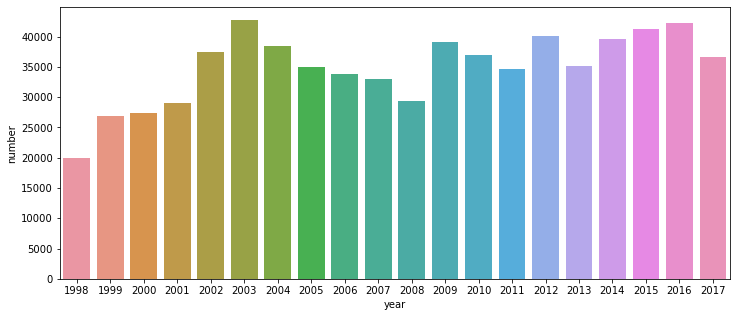

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='year',y='number',data=df1b)
plt.show()


6. In Which State Maximum Number Of Forest Fires were Reported?

In [23]:
df1c=df1.groupby('state')['number'].sum().reset_index()
df1c

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


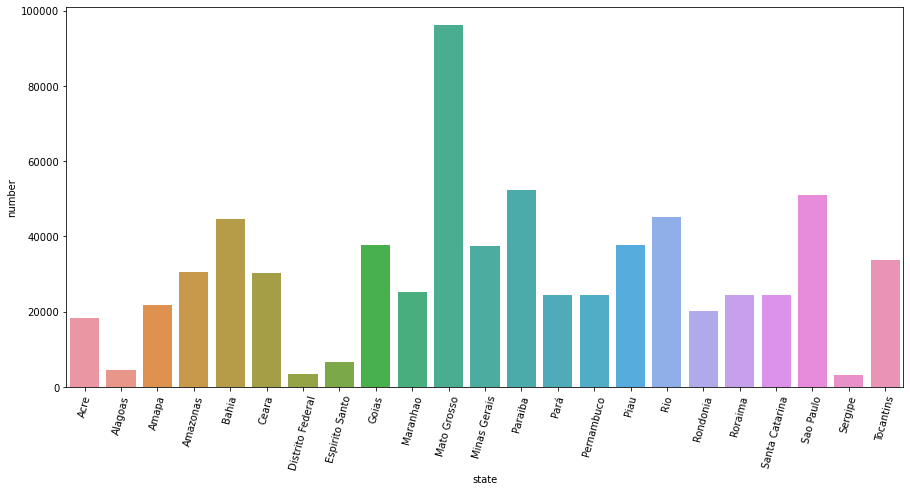

In [24]:
plt.figure(figsize=(15,7))
sns.barplot(x='state',y='number',data=df1c)
plt.xticks(rotation=75)
plt.show()

7. Find The Total Number Of Fires Reported In Amazonas

In [25]:
df1.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [26]:
df1[df1['state']=='Amazonas']['number'].sum()

30650.129

8. Display Number of Fires Reprted In Amazonas(Year-Wise)

In [27]:
df2=df1[df1['state']=='Amazonas']
df3=df2.groupby('year')['number'].sum().reset_index()
df3

,year,number
0,1998,946.000
1,1999,1061.000
2,2000,853.000
3,2001,1297.000
4,2002,2852.000
5,2003,1524.268
6,2004,2298.207
7,2005,1657.128
8,2006,997.640
9,2007,589.601


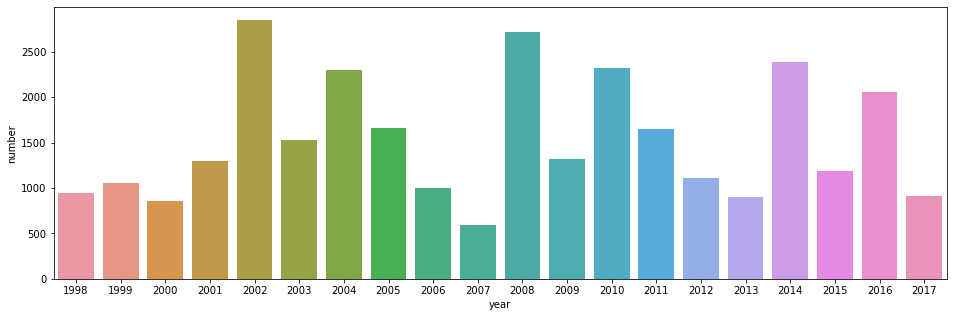

In [28]:
plt.figure(figsize=(16,5))
sns.barplot(x='year',y='number',data=df3)
plt.show()

9.Display Number Of fires Reported in Amazon (Day-Wise)

In [29]:
df1.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [30]:
df2a=df1[df1['state']=='Amazonas']

In [31]:
day=df2a.groupby(df2a['date'].astype('datetime64').dt.dayofweek).sum().number

import calendar

In [32]:
day.index=[calendar.day_name[x] for x in range(0,7)]
day=day.reset_index()

In [33]:
day

,index,number
0,Monday,1886.601
1,Tuesday,6474.217
2,Wednesday,3910.177
3,Thursday,5754.802
4,Friday,5446.480
5,Saturday,4162.666
6,Sunday,3015.186


# plt.figure(figsize=(16,5))
sns.barplot(x='index',y='number',data=day)
plt.show()

10. Find the total number that were reported In 2015 and Visualize Data Based On Each 'Month'

In [35]:
df1.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [36]:
fire=df1[df1['year']==2015].groupby('new_month')['number'].sum().reset_index()
fire

,new_month,number
0,April,2573.000
1,August,4363.125
2,Dec,4088.522
3,Feb,2309.000
4,Jan,4635.000
5,July,4364.392
6,June,3260.552
7,May,2384.000
8,Nov,4034.518
9,Oct,4499.525


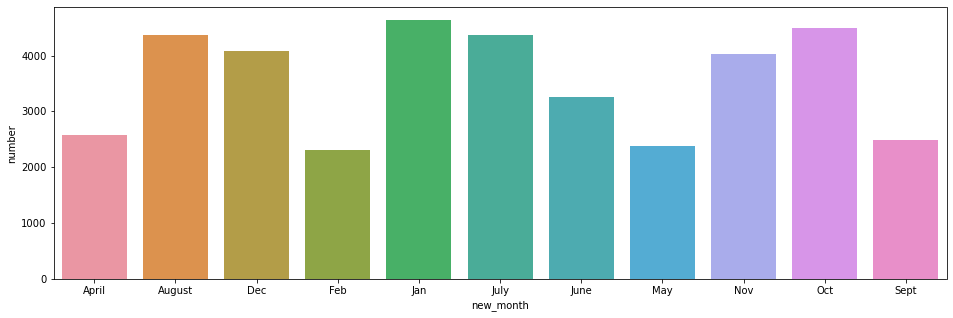

In [37]:
plt.figure(figsize=(16,5))
sns.barplot(x='new_month',y='number',data=fire)
plt.show()

11. Find The average number of Fires Reported from Highest to Lowest(State-Wise) 

In [38]:
df1.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [39]:
data=df1.groupby('state')['number'].mean().sort_values(ascending=False).reset_index()
data

,state,number
0,Sao Paulo,213.896226
1,Mato Grosso,203.479975
2,Bahia,187.222703
3,Piau,158.174674
4,Goias,157.721841
5,Minas Gerais,156.800243
6,Tocantins,141.037176
7,Amazonas,128.243218
8,Ceara,127.314071
9,Paraiba,111.073979


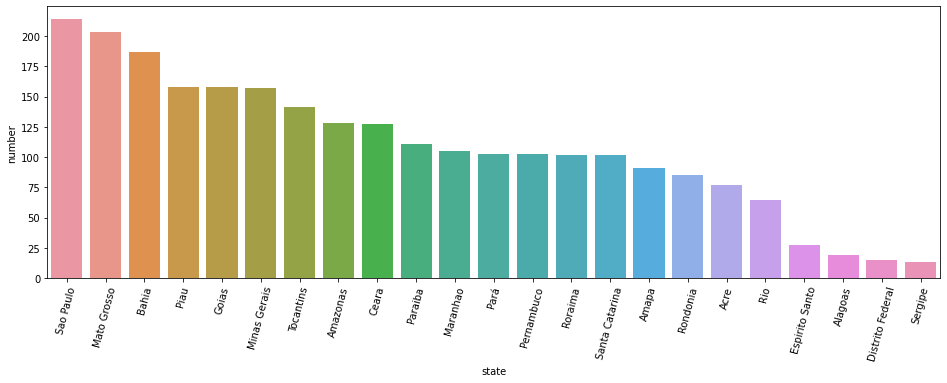

In [40]:
plt.figure(figsize=(16,5))
sns.barplot(x='state',y='number',data=data)
plt.xticks(rotation=75)
plt.show()

12. Find The State where Fires Were Reported In 'dec' Months

In [41]:
df1.columns

Index(['year', 'state', 'number', 'date', 'new_month'], dtype='object')

In [42]:
df1[df1['new_month']=='dec']['state'].unique()

array([], dtype=object)